# 소개

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

이 데이터셋은 [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1)에서 수집되었음.
<br>
1957년 미국과 소련 간 우주 경쟁이 시작된 이후의 모든 우주 임무가 포함되어 있음.

### 국가 코드 패키지 설치

In [22]:
%pip install iso3166

Note: you may need to restart the kernel to use updated packages.


### Plotly 업그레이드

Google Colab을 사용 중이라면 아래의 셀을 실행하세요.

In [23]:
%pip install --upgrade plotly

Note: you may need to restart the kernel to use updated packages.


### 라이브러리 블러오기 (Import Statements)

In [24]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

### 노트북 출력 설정 (Notebook Presentation)

In [25]:
pd.options.display.float_format = '{:,.2f}'.format

### 데이터 불러오기 (Load the Data)

In [26]:
df_data = pd.read_csv('mission_launches.csv')

# 데이터 탐색 (Preliminary Data Exploration)

* `df_data`의 형태는 어떠한가? (What is the shape of `df_data`? )
* 몇 개의 행과 열이 있는가? (How many rows and columns does it have?)
* 열(Column) 이름은 무엇인가? (What are the column names?)
* 결측치(NaN) 또는 중복 데이터가 존재하는가? (Are there any NaN values or duplicates?)

In [27]:
# 데이터의 기본 정보 확인
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0.1    4324 non-null   int64 
 1   Unnamed: 0      4324 non-null   int64 
 2   Organisation    4324 non-null   object
 3   Location        4324 non-null   object
 4   Date            4324 non-null   object
 5   Detail          4324 non-null   object
 6   Rocket_Status   4324 non-null   object
 7   Price           964 non-null    object
 8   Mission_Status  4324 non-null   object
dtypes: int64(2), object(7)
memory usage: 304.2+ KB


- 9개의 컬럼이 있으며, Price값만 964개의 값이 존재하여 나머지는 결측값에 포함됨
<br>
- Unnamed 열이 하나가 불필요해보임

In [28]:
# 데이터프레임의 크기(행, 열) 확인
df_data.shape

(4324, 9)

- 4324개의 행/ 9개의 열

In [29]:
# 컬럼명 확인
df_data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')

In [30]:
# 결측치(NaN) 확인
df_data.isnull().sum()

Unnamed: 0.1         0
Unnamed: 0           0
Organisation         0
Location             0
Date                 0
Detail               0
Rocket_Status        0
Price             3360
Mission_Status       0
dtype: int64

- Price 컬럼에 3360개의 결측치 존재
<br>
- 나머지 컬럼은 결측값 없음

In [31]:
# 중복 데이터 확인
df_data.duplicated().sum()

np.int64(0)

- 중복데이터 없음

## 데이터 정리 (Data Cleaning) - 결측치 및 중복 데이터 확인 (Check for Missing Values and Duplicates)

불필요한 데이터가 포함된 열을 제거

In [36]:
## 중복된 열을 제거
## header=0을 명시적으로 지정하여 올바른 헤더 사용
df_data = pd.read_csv("mission_launches.csv", index_col=0, header=0)

df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4324 entries, 0 to 4323
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      4324 non-null   int64 
 1   Organisation    4324 non-null   object
 2   Location        4324 non-null   object
 3   Date            4324 non-null   object
 4   Detail          4324 non-null   object
 5   Rocket_Status   4324 non-null   object
 6   Price           964 non-null    object
 7   Mission_Status  4324 non-null   object
dtypes: int64(1), object(7)
memory usage: 304.0+ KB


In [40]:
df_data['Price'] = pd.to_numeric(df_data['Price'], errors='coerce')
df_data['Price'] = df_data['Price'].fillna(df_data['Price'].median())

# 결측치(NaN) 확인
df_data.isnull().sum()

Unnamed: 0        0
Organisation      0
Location          0
Date              0
Detail            0
Rocket_Status     0
Price             0
Mission_Status    0
dtype: int64

## 기술 통계 (Descriptive Statistics)

### df_data.describe()
- count: 데이터 갯수
- mean: 평균
- std: 표준편차
- min: 최소값
- 25%: 1사분위수
- 50%: 중앙값
- 75%: 3사분위수
- max: 최대값

In [41]:
df_data.describe()

,Unnamed: 0,Price
count,"4,324.00","4,324.00"
mean,"2,161.50",76.88
std,"1,248.38",72.70
min,0.00,5.30
25%,"1,080.75",62.00
50%,"2,161.50",62.00
75%,"3,242.25",62.00
max,"4,323.00",450.00


### df_data['Price'].describe() - 특정 열에 대한 기술통계

In [42]:
df_data['Price'].describe()

count   4,324.00
mean       76.88
std        72.70
min         5.30
25%        62.00
50%        62.00
75%        62.00
max       450.00
Name: Price, dtype: float64

### df_data['Organisation'].mode() - 최빈값 확인

In [43]:
df_data['Organisation'].mode()

0    RVSN USSR
Name: Organisation, dtype: object

### df_data['Price'].var()- 분산
### df_data['Price'].std()- 표준편차

In [45]:
df_data['Price'].var()  # 분산

np.float64(5285.664729091666)

In [46]:
df_data['Price'].std()  # 표준편차

np.float64(72.70257718328605)

- 분산이 5285.66이고 표준편차가 72.70으로 꽤 크므로, Price 값의 변동성이 크다는 것을 확인할 수 있음.

### df_data['Price'].median() - 중앙값

In [47]:
df_data['Price'].median()

np.float64(62.0)

- 중앙값이 62.0이므로, 데이터의 중위 값이 비교적 낮은 편임. → 평균과 비교하면 Price 값이 치우쳐 있는지(왜곡 여부)도 분석 가능.

### df_data['Price'].skew()  - 왜도 (데이터의 비대칭 정도)
### df_data['Price'].kurt()  - 첨도 (분포의 뾰족한 정도)

In [48]:
df_data['Price'].skew()

np.float64(4.460606705103812)

### 왜도 (Skewness) 분석
- 📌 결과값: 4.46
- 📌 해석:

    - 왜도는 데이터 분포의 비대칭 정도를 나타내는 지표입니다.
    - 0이면 완전히 대칭적인 정규분포(평균을 중심으로 좌우 대칭)를 의미함.
    - 양수(+) 값이면 오른쪽(우측)으로 치우친 분포 (오른쪽 꼬리가 김).
    - 음수(-) 값이면 왼쪽(좌측)으로 치우친 분포 (왼쪽 꼬리가 김).

- ✅ 결과 해석:

    - 👉 4.46이라는 값은 상당히 높은 양수 값이므로, Price 데이터가 우측으로 크게 치우쳐 있다는 것을 의미합니다.
    - 👉 즉, 소수의 높은 값(비싼 발사 비용)이 존재하여 전체 데이터를 끌어올리고 있을 가능성이 높다는 뜻입니다.

In [49]:
df_data['Price'].kurt()

np.float64(19.539255901407653)

### 첨도 (Kurtosis) 분석
- 📌 결과값: 19.53
- 📌 해석:

    - 첨도는 데이터 분포의 뾰족한 정도를 나타냅니다.
    - 정규분포의 첨도는 3 (보통 표준 정규분포에서 Excess Kurtosis는 0).
    - 값이 3보다 크면 급격한 첨도(Leptokurtic) → 중심에 데이터가 몰려 있고, 꼬리가 김.
    - 값이 3보다 작으면 완만한 첨도(Platykurtic) → 데이터가 넓게 퍼져 있음.

- ✅ 결과 해석:

    - 👉 첨도가 19.53으로 매우 크므로, Price 데이터는 정규분포보다 훨씬 뾰족한 형태임.
    - 👉 즉, 대부분의 값이 평균 근처에 밀집해 있지만, 극단적인 이상치(매우 비싼 가격)가 존재할 가능성이 크다.

- 💡 정리
    - 대부분의 로켓 발사 비용이 일정 범위 안에 있지만, 몇 개의 값이 너무 커서 분포가 뾰족하고 긴 꼬리를 형성하고 있음.
    - 이상치를 제거하거나 로그 변환 등의 처리가 필요할 수도 있음.


### 이상치 탐색

In [50]:
Q1 = df_data['Price'].quantile(0.25)
Q3 = df_data['Price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_outliers = df_data[(df_data['Price'] < lower_bound) | (df_data['Price'] > upper_bound)]
print(df_outliers)

      Unnamed: 0  Organisation  \
0              0        SpaceX   
1              1          CASC   
3              3     Roscosmos   
4              4           ULA   
5              5          CASC   
...          ...           ...   
3855        3855  US Air Force   
3971        3971  US Air Force   
3993        3993  US Air Force   
4000        4000  US Air Force   
4020        4020  US Air Force   

                                               Location  \
0            LC-39A, Kennedy Space Center, Florida, USA   
1     Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
3          Site 200/39, Baikonur Cosmodrome, Kazakhstan   
4              SLC-41, Cape Canaveral AFS, Florida, USA   
5          LC-9, Taiyuan Satellite Launch Center, China   
...                                                 ...   
3855            SLC-4W, Vandenberg AFB, California, USA   
3971           SLC-20, Cape Canaveral AFS, Florida, USA   
3993           SLC-20, Cape Canaveral AFS, Florida, USA   
4

###  이상치 데이터의 특성 분석
-  이상치 개수: 908개
    - 전체 데이터에서 908개의 이상치가 발견되었음
    - 전체 데이터 대비 이상치의 비율이 높은 편이므로, 단순히 제거하는 것이 아니라 적절한 조치를 고려해야 함
- 주요 이상치 분석
    - Atlas V 541 | Perseverance (발사 비용: 145.00)
    - Long March 4B | Ziyuan-3 03 (발사 비용: 64.68)
    - Titan IIIA | LES 2 & LCS 1 (발사 비용: 63.23)
- 💡 이해할 점
    - 가격이 비정상적으로 낮거나 높을 경우 이상치로 검출되었을 가능성이 있음
    - 하지만 모든 비싼 발사가 이상치가 아닐 수도 있음 → 실제 비싼 발사가 많을 수도 있음


# 회사별 우주 발사 횟수 (Number of Launches per Company)

우주 임무를 수행하는 각 조직별 발사 횟수를 보여주는 차트

In [51]:
launch_counts = df_data['Organisation'].value_counts()

### 상위 10개 기관의 발사 횟수 시각화

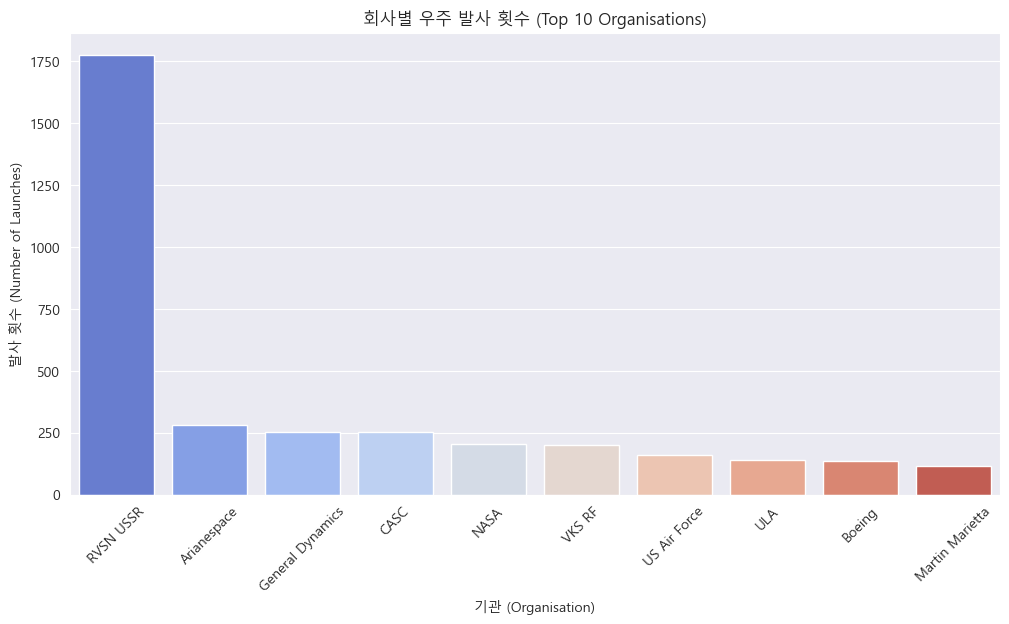

In [53]:
# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')  # 윈도우 (맑은 고딕)
# plt.rc('font', family='AppleGothic')  # 맥 (애플 고딕)
# plt.rc('font', family='NanumGothic')  # 리눅스 (나눔 고딕)

# 마이너스(-) 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

# 데이터 시각화
plt.figure(figsize=(12, 6))
top_orgs = launch_counts.head(10)
sns.barplot(x=top_orgs.index, y=top_orgs.values, hue=top_orgs.index, palette="coolwarm", legend=False)

plt.xlabel("기관 (Organisation)")
plt.ylabel("발사 횟수 (Number of Launches)")
plt.title("회사별 우주 발사 횟수 (Top 10 Organisations)")
plt.xticks(rotation=45)
plt.show()

# 활성 로켓과 퇴역한 로켓의 수 (Number of Active versus Retired Rockets)

현재 운영 중인 로켓과 퇴역한 로켓의 개수를 비교

# 임무 상태 분포 (Distribution of Mission Status)

성공한 임무 개수
<br>
실패한 임무 개수

# 발사 비용 분석 (How Expensive are the Launches?)

히스토그램을 생성하여 비용 분포를 시각화. (가격 데이터는 USD(백만 단위)로 제공되며, 결측치가 있는지 주의)

# 국가별 발사 횟수를 보여주는 단계구분도(Choropleth Map) 생성

*  [the plotly documentation](https://plotly.com/python/choropleth-maps/) 참고하여 단계구분도를 생성
* [plotly's available colours](https://plotly.com/python/builtin-colorscales/)을 실험. 지도에서는 연속적인 색상을 사용.
* `country` 데이터를 추출하고, 존재하지 않는 국가명을 적절히 변경

국가명 정리 (Wrangle the Country Names)

각 국가를 3자리 국가 코드(Alpha-3) 형식으로 변환. 일부 국가명은 직접 변경

- Russia → 러시아 연방 (Russian Federation)
- 뉴멕시코 → 미국 (USA)
- Yellow Sea → 중국 (China)
- Shahrud Missile Test Site → 이란 (Iran)
- Pacific Missile Range Facility → 미국 (USA)
- Barents Sea → 러시아 연방 (Russian Federation)
- Gran Canaria → 미국 (USA)



ISO 3166 패키지를 사용하여 국가명을 Alpha-3 형식으로 변환.

# 국가별 발사 실패 횟수를 단계구분도로 표시 (Use a Choropleth Map to Show the Number of Failures by Country)


# 국가, 조직 및 임무 상태에 대한 Plotly Sunburst 차트 생성 (Create a Plotly Sunburst Chart of the countries, organisations, and mission status.)

# 조직별 우주 임무 비용 총액 분석 (Analyse the Total Amount of Money Spent by Organisation on Space Missions)

# 조직별 발사당 평균 비용 분석 (Analyse the Amount of Money Spent by Organisation per Launch)

# 연도별 우주 발사 횟수 차트 (Chart the Number of Launches per Year)

# 월별 우주 발사 횟수 차트 (현재까지) (Chart the Number of Launches Month-on-Month until the Present)

어느 달에 가장 많은 발사가 이루어졌는가? 월별 시계열 차트에 이동 평균을 적용
(Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart.)

# 월별 발사 횟수: 가장 많은 발사가 이루어진 달과 적은 발사가 이루어진 달은? (Launches per Month: Which months are most popular and least popular for launches?)
일부 달은 기상 조건이 더 유리할수도 있음.
<br>
우주 임무를 수행하기 가장 적절한 시기는 언제 인지 파악
<br>
Some months have better weather than others. Which time of year seems to be best for space missions?

# 발사 비용의 시간에 따른 변화 (How has the Launch Price varied Over Time?)
시간에 따른 로켓 발사 평균 비용을 나타내는 선 그래프를 생성
(Create a line chart that shows the average price of rocket launches over time.)

# 상위 10개 조직별 연도별 발사 횟수 차트 (Chart the Number of Launches over Time by the Top 10 Organisations.)
시간이 지나면서 각 조직의 발사 횟수 점유율이 어떻게 변했는지 확인
(How has the dominance of launches changed over time between the different players?)

# 냉전 시대 우주 경쟁: 미국 vs 소련 (Cold War Space Race: USA vs USSR)
이 데이터셋이 시작된 시점부터 1991년까지 냉전이 지속 (The cold war lasted from the start of the dataset up until 1991.)

## 미국과 소련(USSR)의 총 발사 횟수를 비교하는 Plotly 원형 차트 생성 (Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA)

총 발사 횟수를 분석할 때 카자흐스탄과 같은 구소련 국가들도 포함
(Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches. )

## 두 초강대국(미국과 소련)의 연도별 총 발사 횟수를 나타내는 차트 생성 (Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers)

## 연도별 임무 실패 총 횟수 차트 (Chart the Total Number of Mission Failures Year on Year.)

## 시간에 따른 실패율 차트 (Chart the Percentage of Failures over Time)
실패율이 증가했는가, 감소했는가? 시간이 지남에 따라 각국은 위험을 줄이고 성공 확률을 높이는 데 성공했는가?
(Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time?)

# 각 연도별 총 발사 횟수를 기준으로 어느 나라가 선두였는지 확인 (2020년까지 포함) (For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020))

성공적인 발사만 고려하면 결과가 달라지는가?
<br>
Do the results change if we only look at the number of successful launches? 

# 연도별 가장 많은 발사를 수행한 조직을 나타내는 차트 생성 (Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches)
1970년대와 1980년대에는 어떤 조직이 우세했나?
<br>
2018년, 2019년, 2020년에는 어떤 조직이 가장 많은 발사를 수행했나?
<br>
Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020? 